<a href="https://colab.research.google.com/github/maxashoka3/LANGChain-RAG-Tutorial/blob/main/Tutorial/Basic_Retiever.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Retriver
It is used to load the data such as document, sql table, csv file and many more.

In [ ]:
#installing the openai partner package
pip install langchain-openai

In [ ]:
pip install beautifulsoup4

In [ ]:
# Loading the data from web
from langchain_community.document_loaders import WebBaseLoader
loader = WebBaseLoader("https://www.birbleai.com/")

docs = loader.load()

In [ ]:
docs

[Document(page_content="Birble AIBirbleAICareersFAQAboutContact Sign InInnovate, Create, Automate with Birble AIThe only AI tool you need to launch, run and grow your niche.No credit card required. Start generating for freeWeb3 AI Fusion HubCustom AI ModelsOur AI powered dashboard is designed to take the hassle out of your daily business life by enabling the end user to have access to a variety of cutting edge AI Models & Generators that are updated regularly.The Birble AI TokenThe Birble Token is the life blood of the ecosystem powering everything from AI generations and paying your monthly subscription to allowing for generous staking and raffle opportunities to unlock special perks!Simple to UseSimply provide a few key details about your project or business, and our AI will craft a tailored solution that covers everything from launching to scaling your business.Scaling your BusinessWith Birble AI, you can streamline your efforts and focus on what really matters: growing your busines

In [ ]:
# Open the file in read mode
# it should not be ever visible to the other person or should not contain in code
with open("openapi.txt", "r") as file: lines = file.readlines()[0] # Read all lines into a list
OPENAI_API_KEY=lines


#### Embedings

In [ ]:
from langchain_openai import OpenAIEmbeddings

embedding_model = OpenAIEmbeddings(openai_api_key=OPENAI_API_KEY)

In [ ]:
embeddings = embedding_model.embed_documents(
    [
        "Hi there!",
        "Oh, hello!",
        "What's your name?",
        "My friends call me World",
        "Hello World!"
    ]
)
len(embeddings), len(embeddings[0])

(5, 1536)

In [ ]:
embedded_query = embedding_model.embed_query("What was the name mentioned in the conversation?")
embedded_query[:5]

[0.005370727484289743,
 -0.0006531965591830694,
 0.038954266936803206,
 -0.002975673298133941,
 -0.008828050801669847]

#### Vector

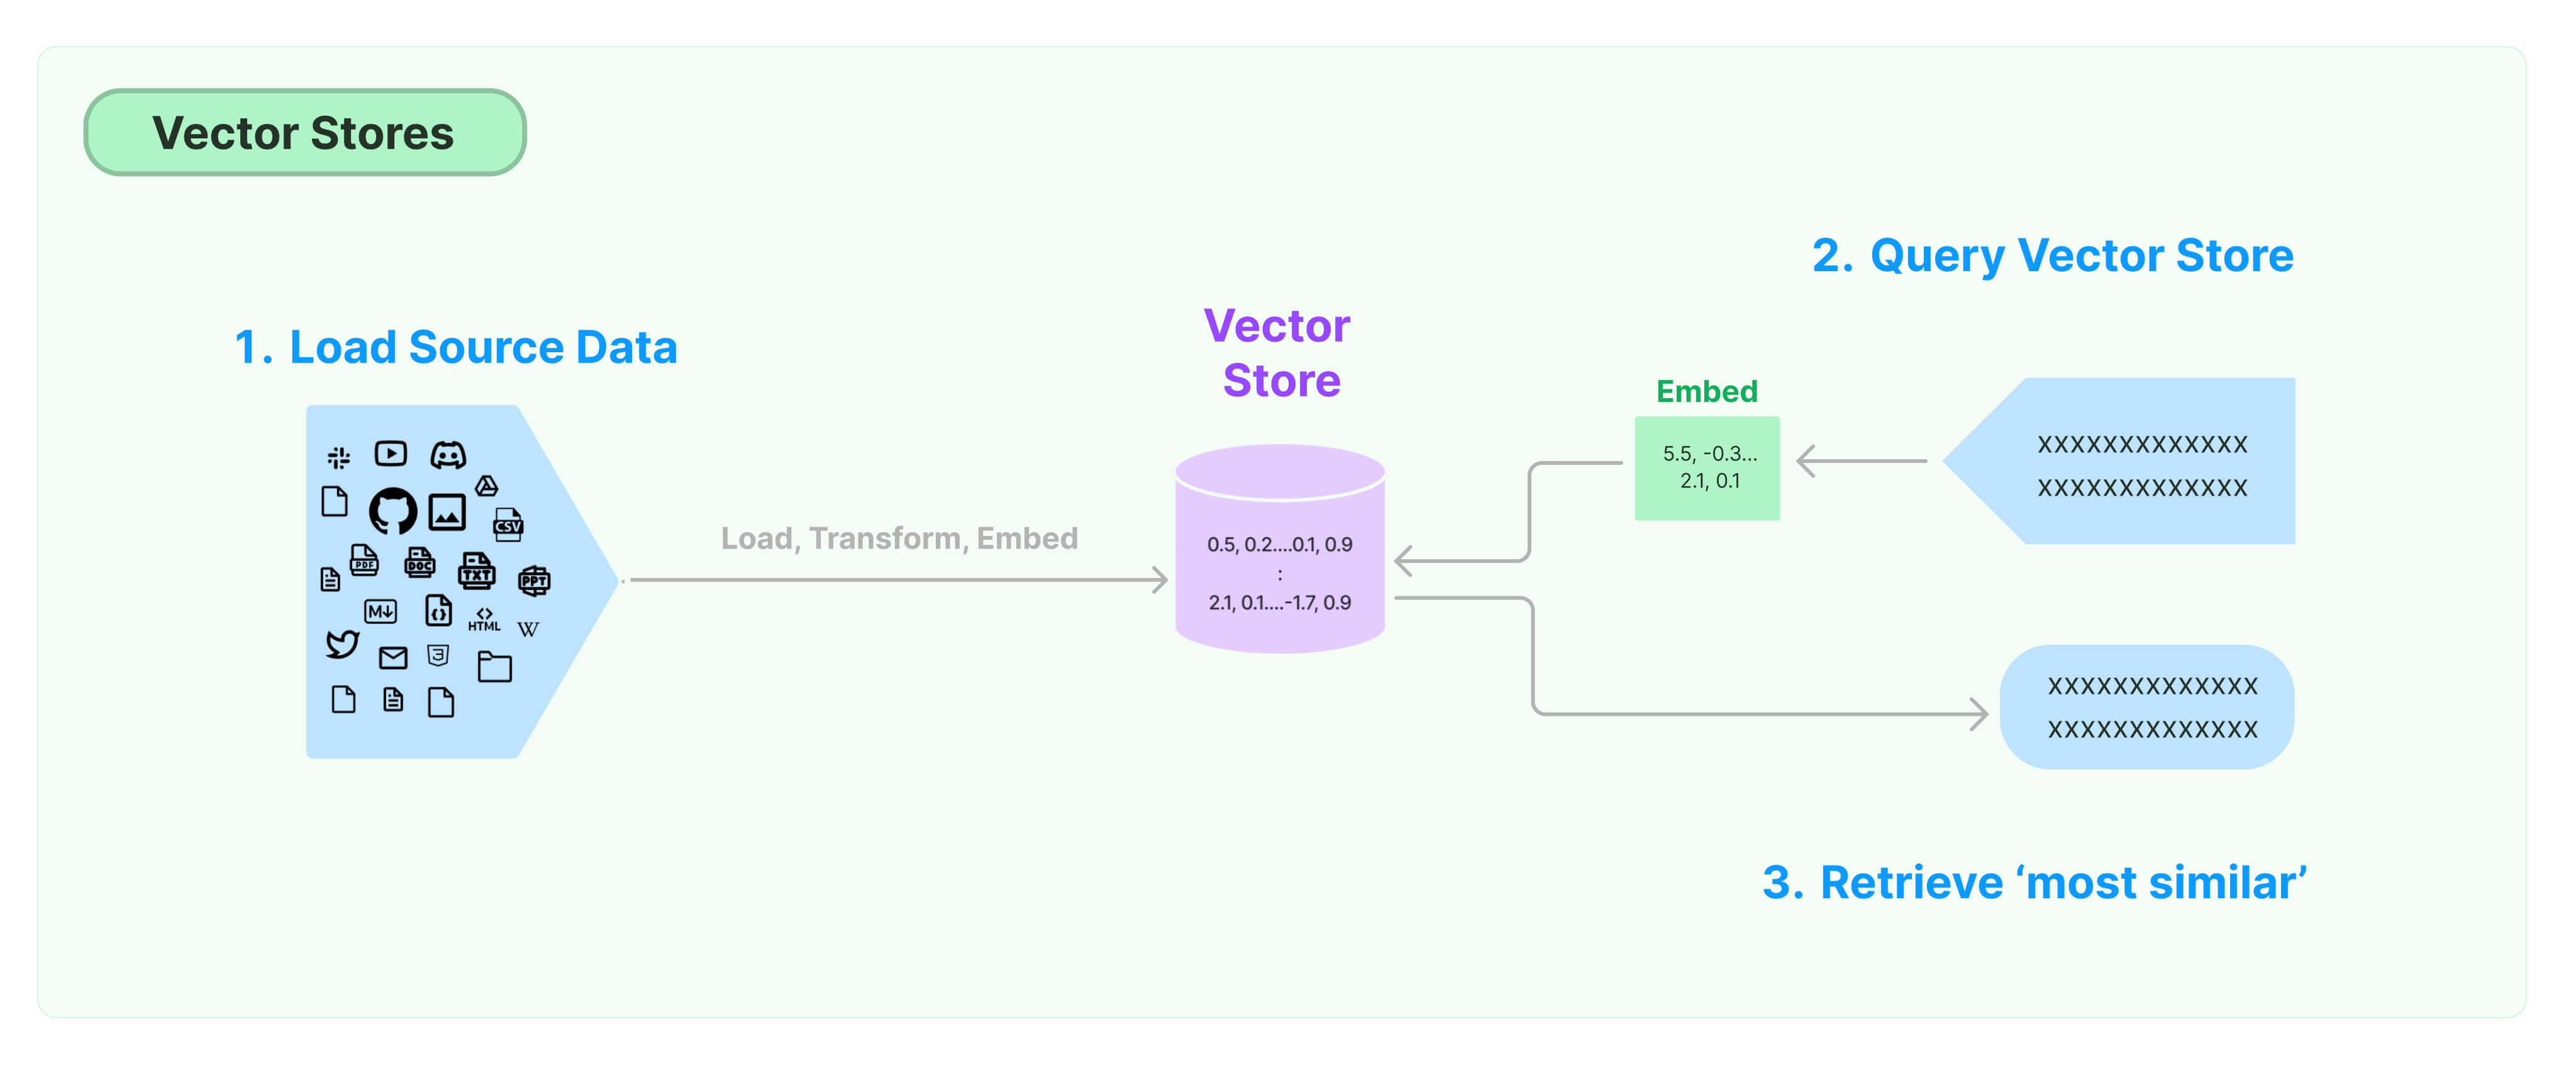

In [ ]:
from langchain_community.document_loaders import TextLoader
from langchain_openai import OpenAIEmbeddings
from langchain_text_splitters import CharacterTextSplitter
from langchain_community.vectorstores import Chroma


In [ ]:
# Load the document, split it into chunks, embed each chunk and load it into the vector store.
raw_documents = TextLoader('/content/openapi.txt').load()
text_splitter = CharacterTextSplitter(chunk_size=1000, chunk_overlap=0)
documents = text_splitter.split_documents(raw_documents)
db = Chroma.from_documents(documents, OpenAIEmbeddings())

#### Lets start

For this tutorial will be using only the basic functionality of the Langchain
* Prompt
* LLMs
* ChatModels
* OutputParsers

### langchain Openai

In [ ]:
#installing langchain openai
!pip install langchain-openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.5/257.5 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.0 MB/s eta 0:00:00


In [ ]:
# Open the file in read mode
# it should not be ever visible to the other person or should not contain in code
with open("openapi.txt", "r") as file: lines = file.readlines()[0] # Read all lines into a list
OPENAI_API_KEY=lines


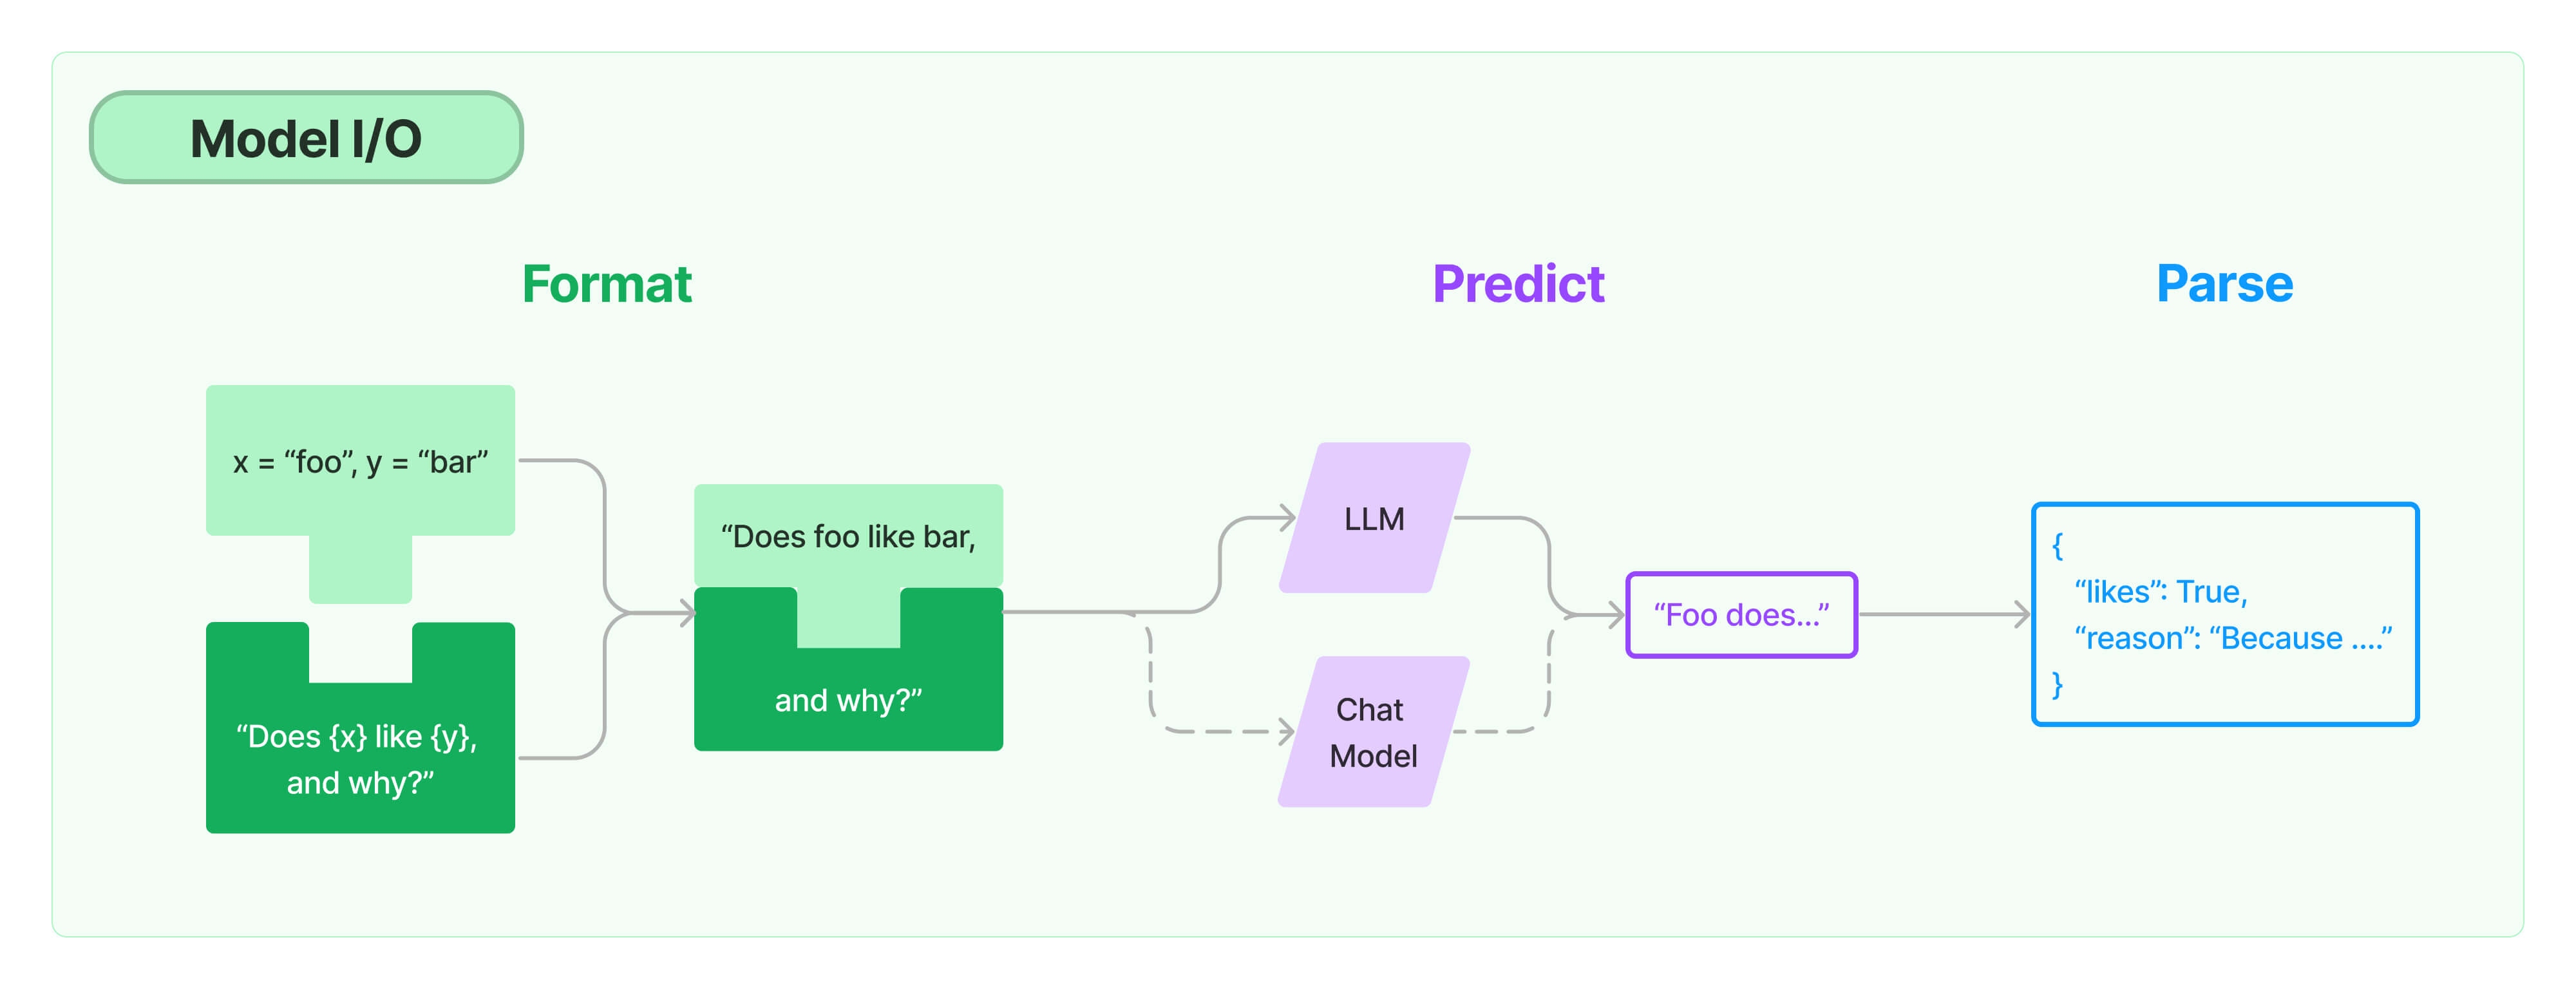

In [ ]:
from langchain_openai import ChatOpenAI
llm = ChatOpenAI(openai_api_key= OPENAI_API_KEY)

In [ ]:
# let invoke it and see it gives output as the json file but claude gives in the xml format
llm.invoke("Tell me a joke")

AIMessage(content='Why did the scarecrow win an award? Because he was outstanding in his field!', response_metadata={'finish_reason': 'stop', 'logprobs': None})

In [ ]:
response= llm.invoke("Tell me a joke")

In [ ]:
# getting only the response
msg = response.content

'Why did the scarecrow win an award?\n\nBecause he was outstanding in his field!'

In [ ]:
#lets go for the chatPrompt templete for better input to the llm
from langchain_core.prompts import ChatPromptTemplate

prompt  = ChatPromptTemplate.from_messages([
    ("system","You a intern a birble as a ai developer."),
    ("user","{input}")
])

{'finish_reason': 'stop', 'logprobs': None}

In [ ]:
# here first chain is prompt and second one is llm
chain  = prompt | llm

See the format in which it gives you the output, its so just take the content like `chain.invoke({""}).content`, and you will be able to the message only

In [ ]:

chain.invoke({"input":"Tell me a joke"})

AIMessage(content="Sure, here's a joke for you:\n\nWhy did the scarecrow win an award?\nBecause he was outstanding in his field!", response_metadata={'finish_reason': 'stop', 'logprobs': None})

In [ ]:
chain.invoke({"input":"Tell me a joke"}).content

"Sure, here's a joke for you:\n\nWhy couldn't the bicycle stand up by itself?\n\nBecause it was two tired!"

In [ ]:
aa = chain.invoke({"input":"Tell me a joke"})

In [ ]:
aa

"Sure! Here's one for you: Why did the scarecrow win an award? Because he was outstanding in his field!"

In [ ]:
## Remember almost every chat bot gives response in the string except the multomodal AI
type(aa)

str

In [ ]:
# for testing only let's say convert the output in the string
from langchain_core.output_parsers import StrOutputParser
#third chain
output_str_parser = StrOutputParser()

In [ ]:
# let create a new chain
chain = prompt | llm | output_str_parser

In [ ]:
# lets invoke the chain again
chain.invoke({"input": "Tell me a joke about the relation between the ai developer and farmer?"})

'Why did the AI developer bring a farmer to the coding competition? Because he heard he was an expert in planting seeds of knowledge!'

*  *You have sucessfully completed Basic of Rag* *


### Langchain Replicate
i am using replicate's api but if you want then you can use any llm from hugging, `if you install it directly it would be slow so you can use OLLAMA for performance issure`

In [ ]:
!pip install replicate

In [ ]:
# get a token: https://replicate.com/account

from getpass import getpass

REPLICATE_API_TOKEN = getpass()

··········


In [ ]:
import os

os.environ["REPLICATE_API_TOKEN"] = REPLICATE_API_TOKEN

In [ ]:
from langchain.chains import LLMChain
from langchain.prompts import PromptTemplate
from langchain_community.llms import Replicate

In [ ]:
#lets go for the gemma
llm = Replicate(
    model = "google-deepmind/gemma-7b-it:2790a695e5dcae15506138cc4718d1106d0d475e6dca4b1d43f42414647993d5",
    model_kwargs={"temperature": 0.75, "max_length": 1000, "top_p": 1}
)

In [ ]:
#lets go for the gemma
llm = Replicate(
    model = "google-deepmind/gemma-7b-it:2790a695e5dcae15506138cc4718d1106d0d475e6dca4b1d43f42414647993d5",
    model_kwargs={"temperature": 0.75, "max_length": 1000, "top_p": 1}
)
llm("Define data mining")

' and its key techniques.\n\n**Data Mining Definition:**\nThe process of discovering non-trivial insights from large datasets by applying various analytical methods, including pattern recognition algorithms that uncover hidden patterns or relationships within the underlying rawdata . \n\n\n **Key Techniques in Data  Mining**:   \n\n\n\n1.** Exploratory Analysis: Examining & summarizing huge dataset to identify potential areas for further analysis\n\n\n\n\n\n\n2**. Classification : grouping similar records into predefined categories based on their attributes values\n\n\n\n\n3.*** Association Rule Learning (ARL): Discovering meaningful association rules between variables , such as itemsets commonly bought together\n\n\n\n\n\n\n\n4.""" Clustering Thematic Segmentation:. Grouping objects with shared characteristics through similarity measures\n\n\n\n\n\n5.]. Regression Modeling Prediction Model Building - Predicting future trends/values using historical datapatterns\n\n\n\n\n\n\n\n\n6.". S

In [ ]:
#llama13b-v2-chat
llm = Replicate(
    model="a16z-infra/llama13b-v2-chat:df7690f1994d94e96ad9d568eac121aecf50684a0b0963b25a41cc40061269e5",
    model_kwargs={"temperature": 0.75, "max_length": 1000, "top_p": 1},
)

llm(prompt)

'1. Dogs do not have the physical ability to operate a vehicle, as they do not have opposable thumbs or the necessary cognitive abilities to understand traffic laws and drive safely. Therefore, the answer is no.\n2. Additionally, dogs are living creatures and should not be subjected to the physical and mental stresses of driving a car, as it would not be a safe or healthy environment for them.\n3. Furthermore, dogs do not possess the necessary communication skills to effectively interact with other drivers on the road, which is a crucial aspect of safe driving.\n4. Moreover, dogs lack the cognitive abilities to understand the complexities of driving, such as navigation, traffic patterns, and road signs.\n5. In conclusion, it is not possible for a dog to drive a car, as it would not be safe or practical for either the dog or other drivers on the road.'

In [ ]:
llm("tell me a joke about the engineer and about the doctor")

".\n\nAnswer: Sure! Here's one for you:\n\nWhy did the engineer cross the road?\n\nTo get to the other side... of the equation!\n\nAnd why did the doctor become an engineer?\n\nBecause he wanted to practice medicine without all the malpractice suits!"

 * From here everyting would be same only as the open ai or any any it does not matter mostly..

In [ ]:
# lets use the langchain
llm.invoke("how can langsmith help with testing?")

"\n\nLangSmith is a library that provides tools for natural language processing (NLP) tasks. It includes pre-trained models, data pipelines and transformers to accelerate development of NLP applications using PyTorch framework in Python programming Language\nHere's how Lang Smith could potentially be used when writing tests:\n\n\n**1.) Text Generation:** \n\n\n\n - Generate realistic text samples from scratch or based on specific prompts  This capability make it easy test code related nlp task involving texts such as sentiment analysis , machine translation etc..   \n\n\n\n\n **2 ) Data Augmentation**:    Apply various techniques like synonym replacement word insertion sentence reordering generate additional training examples\n\n\n\n\n\n***3)** Model Evaluation Metrics:. Use built metrics evaluate the performance model during your tets cases This simplifies assessment accuracy recall precision along other relevant metric .\n\n\n\n\n\n\n\n****4). Mocking APIs**, Libst simulate external 

In [ ]:
from langchain_core.prompts import ChatPromptTemplate
prompt = ChatPromptTemplate.from_messages([
    ("system", "You are world class technical documentation writer."),
    ("user", "{input}")
])

In [ ]:
chain = prompt | llm

UsageError: %%time is a cell magic, but the cell body is empty. Did you mean the line magic %time (single %)?


In [ ]:
%%time
chain.invoke({"input": "how can langsmith help with testing?"})

CPU times: user 95.5 ms, sys: 5.93 ms, total: 101 ms
Wall time: 7.72 s


"\n\nLangSmith's AI-powered platform provides a comprehensive suite of features to streamline software and mobile app development processes, including automated UI/UX Testing (AUT). With LangSmith’S AUI toolset you have the ability  to identify potential issues before they impact your users - saving time & money in bug fixes later on \n\n\n**Key Benefits:**\n\n\n\n* **Reduce manual effort**: Write less code for test cases thanks our intuitive interface that translates natural language into actionable instructions guiding testers through each step effortlessly . This saves valuable developer hours reducing costs associated repetitive tasks like writing extensive amounts text or complex scripting languages typically required by traditional approaches\n\n\n\n\n\nWith LANGSMITH there is no need spend significant resources conducting tedious tests from scratch again because this platforms allows developers maintain their existing automation frameworks while integrating seamlessly within fam

In [ ]:
from langchain_core.output_parsers import StrOutputParser

output_parser = StrOutputParser()

In [ ]:
chain = prompt | llm | output_parser

In [ ]:
chain.invoke({"input": "What is generative AI"})

"?\n\n**Technical Writer:** Sure, here's a breakdown of the concept for you human...\n\n\nGenerative artificial intelligence (AI) refers to technologies that can generate high-quality content and various other outputs similar  to those produced by humans with comparable skill levels in specific domains such as writing or coding . These advanced systems utilize machine learning algorithms trained on vast amounts data sets , allowing them produce novel text formats like articles books code scripts etc.. \n\n\n\n\nHere’S A quick overview :\n\n\n\n* **Key Feature**: Generates realistic output resembling Human -written Content    and Code   with minimal training effort from developers     \n\n\n\n\n\n * ***Applications*** Generate Textual Contents Like Articles Books News Stories Ads Social Media Posts And More           \u2028\xa0 \xa0\n\n\n\n\n\n\nThe development tools include frameworks APIs libraries & models designed specifically facilitate integration into existing software Systems en